In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

<i>The Poisson distribution</i> is the most suitable one to predict the probability of a specific number of events occuring within a fixed time interval.<br>
There are two assumptions: a constant mean rate should be known and the events shouls occur independently.<br>

The Poisson distribution is a discrete probability distribution and it is closely related to Exponential contionuos distribution:
- <b>The number of events per unit time</b> follows a Poisson distribution
- <b>The time between events</b> follows an Exponential distribution

##### Materials
- [Poisson Distribution — Intuition, Examples, and Derivation](https://towardsdatascience.com/poisson-distribution-intuition-and-derivation-1059aeab90d#4c74)



## PMF - Probability Mass Function
> PMF is used to describe the discrete probability distributions

#### Formula
#### $P(k\space events\space in\space interval) = e^{-\lambda}\frac{\lambda^k}{k!}$
- $\lambda$ is an average number of events per interval
- $e$ is Euler's number
- $k$ is a random value parameter which may take integer values (0, 1, 2...)
    - $k$ is a number of events occurring within a certain time period

##### Poisson distribution additional specifics
- The Poisson Distribution is asymmetric and it is always skewed towards the right.<br> Because it is limited by the zero occurrence barrier (there is no such thing as “minus one” clap) on the left and has no limit on the right.
- As $\lambda$ increases, the graph starts to look more like a normal distribution.


#### The Poisson distribution is similar to binomial distribution and practically based on it

- The Binomial random variable represents the number of successes $k$ in $n$ amount of samples. Then using $k$ and $n$ parameters we can calculate a probability of sucessfull event $p$

> However the Binomial distribution has a row of limitations:
> - This distribution is binary
> - A amount of trials should be known

> The Poisson distribution outclasses these constraints:
> - Using Poisson we split the unit of data into smaller units, which is represented as $n > \infty$
> - According to the infinite n, $p$ must approach to 0
> - In the result, the only parameter of the Poisson distribution is the rate $\lambda$ (the expected value of x)


##### Compare the results from the Binomial and Poisson distributions

In [15]:
n = 2000 # total amount of samples
k = 15 # a amount of successfull events
p = 15/2000 # probability

print(f'Binomial probability to get 17 successes out of 1134 trials {round(stats.binom.pmf(k=k, n=n, p=p), 3)}')
print(f'Poisson probability to get 17 successes out of 1134 trials {round(stats.poisson.pmf(k=k, mu=k), 3)}')

Binomial probability to get 17 successes out of 1134 trials 0.103
Poisson probability to get 17 successes out of 1134 trials 0.102


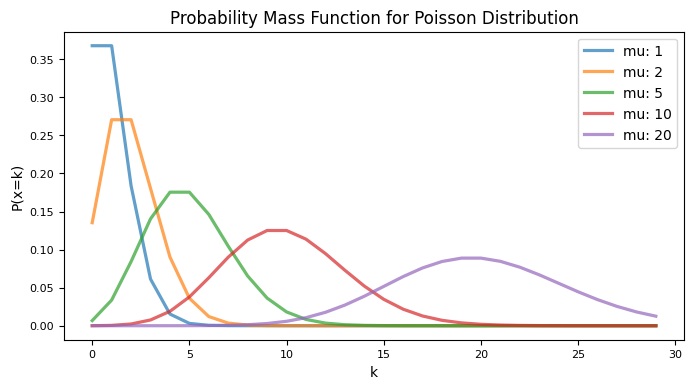

In [151]:
x = np.arange(0,30)
mu_list = [1, 2, 5, 10, 20]

plt.figure(figsize=(8, 4))

for mu in mu_list:
    plt.plot(
        x,
        stats.poisson.pmf(k=x, mu=mu),
        label=f'mu: {mu}',
        linewidth=2.3,
        alpha=.7
    )
plt.title('Probability Mass Function for Poisson Distribution')
plt.xlabel('k')
plt.ylabel('P(x=k)')
plt.tick_params(labelsize=8)

plt.legend()
plt.show();


## CDF - Cumulative Density Function
- Inverse of $ppf$
- Returns a percentile from a declared data point


### CDF & PMF Comparison

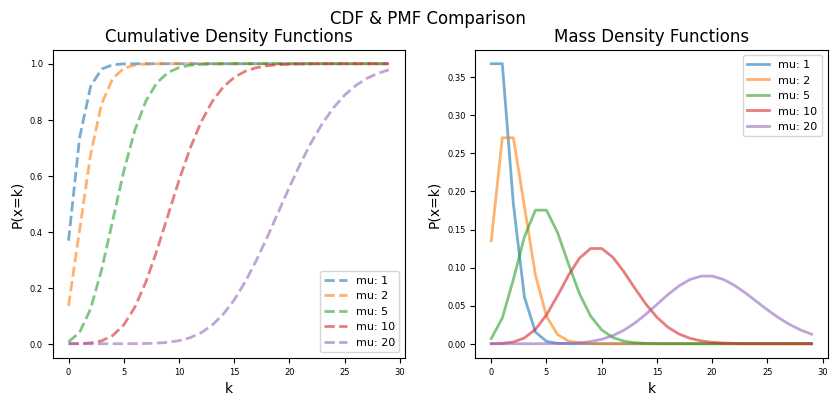

In [134]:
x = np.arange(0,30)
mu_list = [1, 2, 5, 10, 20]

fig, axs = plt.subplots(1, 2, figsize=(10, 4)) 

plt.suptitle('CDF & PMF Comparison')

for mu in mu_list:
    # cdf
    axs[0].plot(
        x,
        stats.poisson.cdf(k=x, mu=mu),
        label=f'mu: {mu}',
        linestyle='--',
        linewidth=2,
        alpha=.6
    )
    # pmf
    axs[1].plot(
        x,
        stats.poisson.pmf(k=x, mu=mu),
        label=f'mu: {mu}',
        linestyle='-',
        linewidth=2,
        alpha=.6
    )

axs[0].set_title('Cumulative Density Functions')
axs[0].set_xlabel('k')
axs[0].set_ylabel('P(x=k)')
axs[0].tick_params(labelsize=6)
axs[0].legend(fontsize=8)

axs[1].set_title('Mass Density Functions')
axs[1].set_xlabel('k')
axs[1].set_ylabel('P(x=k)')
axs[1].tick_params(labelsize=6)
axs[1].legend(fontsize=8)

plt.show();


## PPF - Percent Point Function
- Inverse of $cdf$
- Returns a data point from a declared percentile

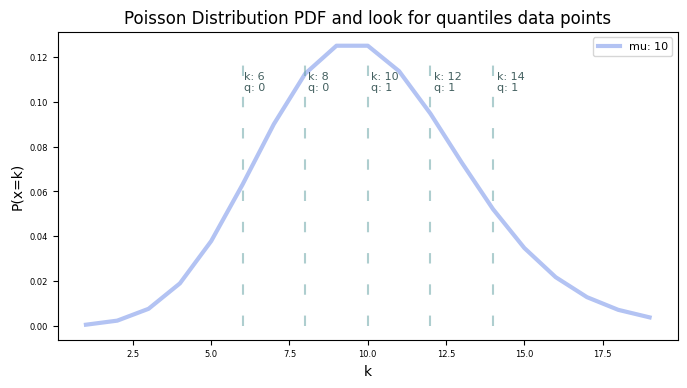

In [152]:
x = np.arange(1,20)
mu = 10
quantile_list = np.arange(.1, 1, .2)

plt.figure(figsize=(8, 4))

plt.title('Poisson Distribution PDF and look for quantiles data points')
plt.plot(
    x,
    stats.poisson.pmf(k=x, mu=mu),
    label=f'mu: {mu}',
    color='royalblue',
    linewidth=3,
    alpha=.4
)
plt.tick_params(labelsize=6)
plt.xlabel('k')
plt.ylabel('P(x=k)')
plt.legend(fontsize=8)

for quantile in quantile_list:
    k_value = stats.poisson.ppf(q=quantile, mu=mu)
    plt.vlines(k_value, 0, .12, color='cadetblue', alpha=.5, linestyle=(0, (5, 10)))
    plt.annotate(f'k: {round(k_value)}', xy=(k_value + k_value * .01, .11), color='darkslategrey', alpha=.9, fontsize=8)
    plt.annotate(f'q: {round(quantile)}', xy=(k_value + k_value * .01, .105), color='darkslategrey', alpha=.9, fontsize=8)